## Excitatory vs Inhibitory
 #### Questions:
  - Are there any event types that has significantly less excitadory or inhibited neurons?
  - If there clearly exists a type of event that has more excited or inhibited could we possibly group them by any types of features?
  - Out of these neurons what percent of these are pyr vs inter?
  - Are there any neurons that are way more excited or inhibited?
  - Are there any neurons that do or do not overlap across different events in the recordings.

#### Plot/Results Ideas:
 - Pie plot of percentage of excited vs inhibited during an event | Bar Plot as well to show all the events
 - If there's a clear pattern in an event type, make swarm plots of the neurons, y-axis z-score, x-axis events, show's groupings of inhibited and excited
 - More plot for putative types included tbd
 - Overlap Plots


#### Method:
 - To answer if there are event types that have much less excited vs inhibited, count number of excited vs inhibited per event type.

#### DataFrame Definitions:
 - Recording – Recording Filename, identifier for the recording session
 - Event name – Label of the behavioral or experimental event
 - Unit number – Unique number identifying a neuron/unit.
 - Event Z-Score – Standardized response of the unit during the event window relative to baseline.
  - Positive Z = excitatory (above baseline)
  - Negative Z = inhibitory (below baseline)
 - sig – tells you whether a neuron was significant during those events ('increase', 'decrease', 'not sig')
 - Event windows – The number of events it was
 - putative type – Cell type classification (e.g., pyramidal vs interneuron).

In [116]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re
import ast

In [117]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [118]:
EVENTS = [
    'alone_rewarded', 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose',
    'high_comp_lose_baseline', 'high_comp_win', 'high_comp_win_baseline',
    'lose', 'low_comp', 'low_comp_lose', 'low_comp_lose_baseline',
    'low_comp_win', 'low_comp_win_baseline', 'overall_pretone', 'win'
]

In [119]:
df_path = r"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/rce_zscore_putative_types.csv"

In [120]:
# 1) Read
units_df = pd.read_csv(df_path)
units_df.head(30)

,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Event M,Event Z-Score,sig,Event windows,putative type
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.939130,1.459821,0.75,-0.129557,not sig,40,pyramidal
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,3.191304,4.476306,2.70,-0.109757,not sig,40,pyramidal
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,1.434783,3.471325,1.85,0.119614,not sig,40,pyramidal
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,10.554348,8.245900,6.90,-0.443171,not sig,40,pyramidal
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,43.439130,33.150621,32.15,-0.340541,not sig,40,pyramidal
5,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,130,0.686957,0.926567,1.05,0.391816,not sig,40,pyramidal
6,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,143,10.991304,12.726894,9.70,-0.101463,not sig,40,pyramidal
7,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,147,0.371739,1.175319,0.60,0.194212,not sig,40,pyramidal
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,3.400000,4.478062,5.70,0.513615,not sig,40,pyramidal
9,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,189,19.228261,9.698614,18.15,-0.111177,not sig,40,pyramidal


##### Filtering for only Significant Units and Dropping Unecesary Columns Global Pre-event M | Global Pre-event SD | Event M

In [121]:
units_df = units_df[units_df['sig'] != 'not sig']
units_df = units_df.drop(["Global Pre-event M", "Global Pre-event SD", "Event M"], axis=1)

In [122]:
units_df.head(10)

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows,putative type
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,2.196282,increase,40,pyramidal
58,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,23,2.526329,increase,9,pyramidal
124,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_win,23,2.717424,increase,8,pyramidal
154,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,lose,104,2.096743,increase,7,pyramidal
170,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,lose,33,2.188618,increase,7,pyramidal
183,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,147,2.081513,increase,11,pyramidal
190,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,23,1.669298,increase,11,pyramidal
192,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,33,1.738209,increase,11,pyramidal
194,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp,65,2.198388,increase,11,pyramidal
198,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,low_comp_lose,104,2.439251,increase,6,pyramidal


In [123]:
len(units_df['Unit number'])

412

In [124]:
len(units_df['Unit number'].unique())

117

### Swarm Plot of each Event Types Neurons and their Z-Scores

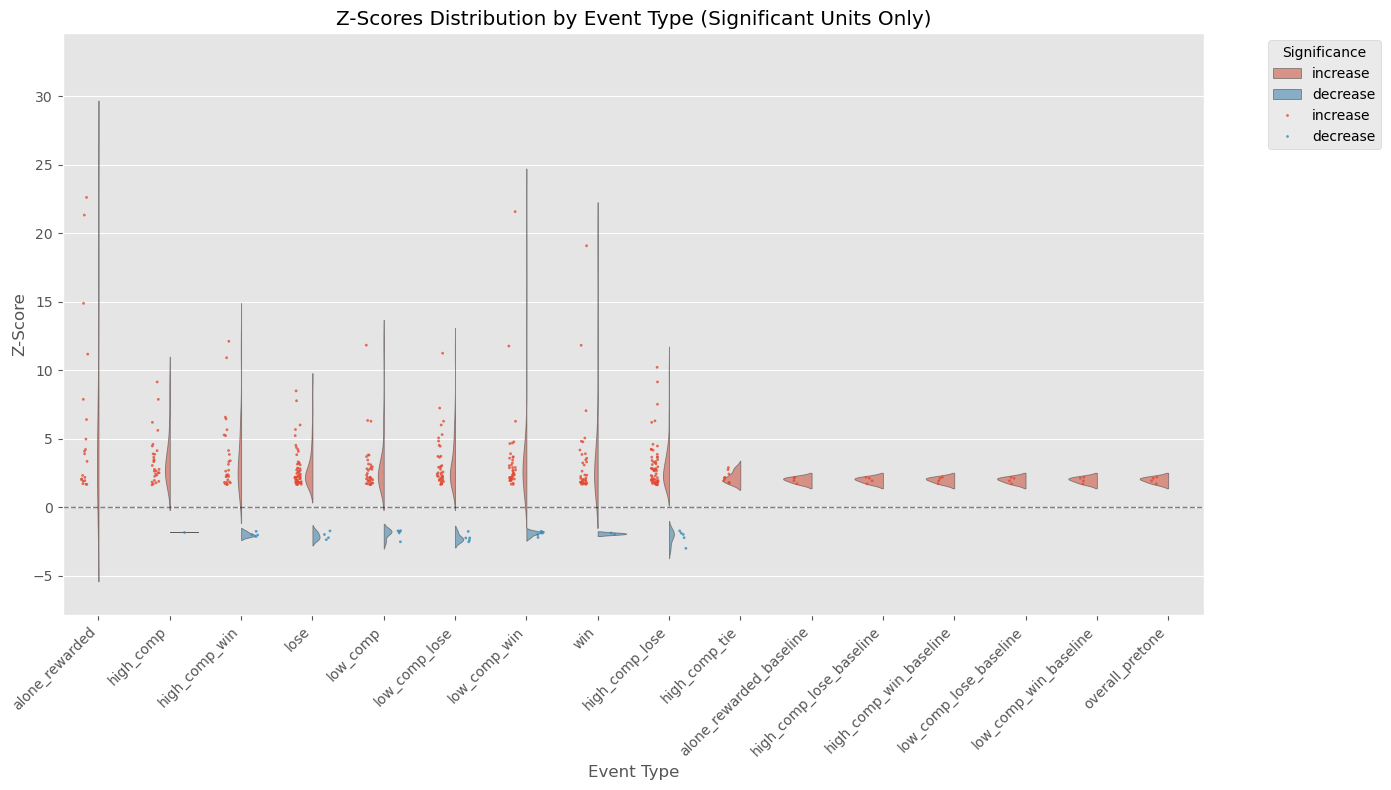

In [125]:
swarm_df = units_df.copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
# Create violin plot with strip plot overlay for better visualization of dense data
sns.violinplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', split=True, inner=None, alpha=0.6)
sns.stripplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=2, jitter=True, alpha=0.8, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Including all Events Swarm Plot

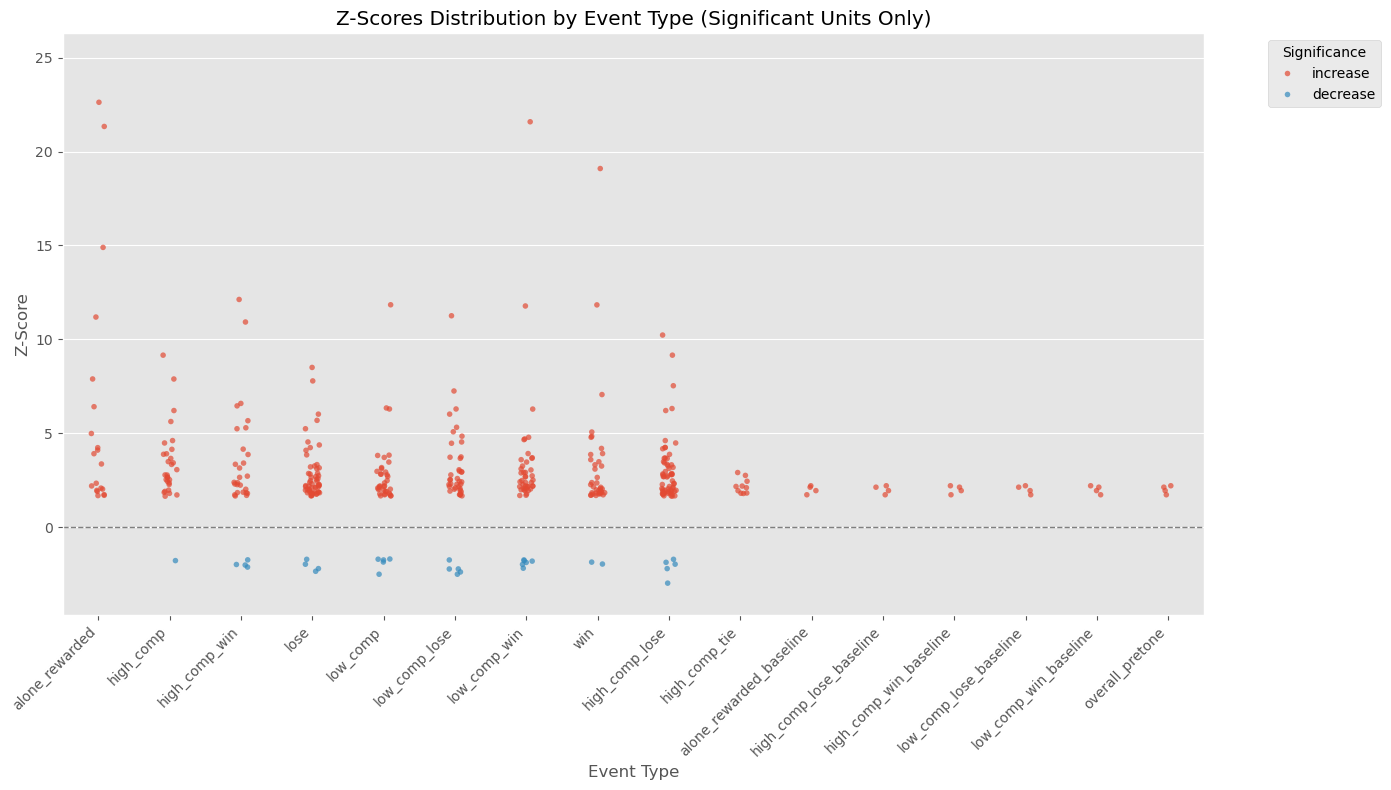

In [126]:
swarm_df = units_df.copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
# Replace swarmplot with stripplot - it handles overlapping points better
sns.stripplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=4, jitter=True, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

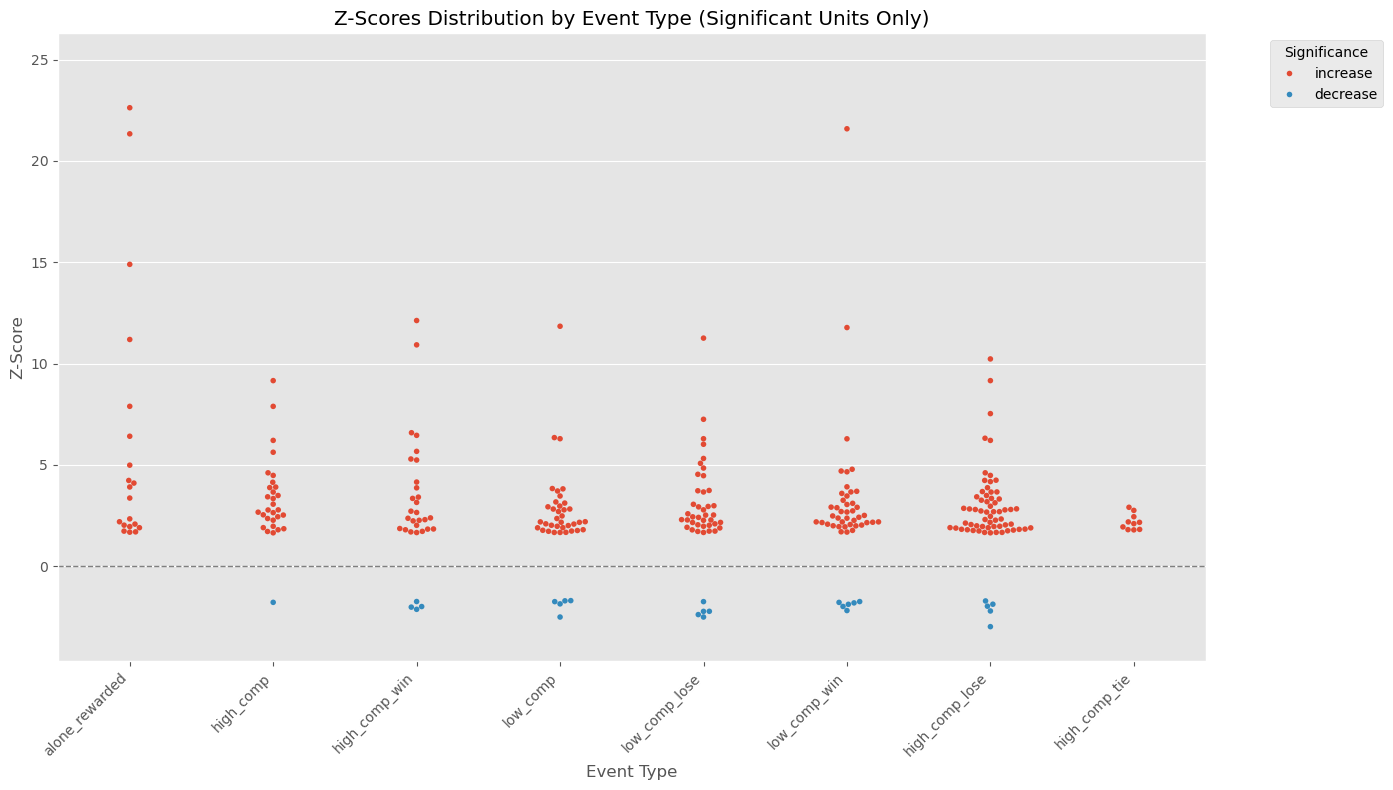

In [127]:
# Filter out baseline events and general win/lose events for swarm plot
events_to_exclude = [
    'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline',
    'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone', 'win', 'lose'
]

swarm_df = units_df[~units_df['Event name'].isin(events_to_exclude)].copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.swarmplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=4)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

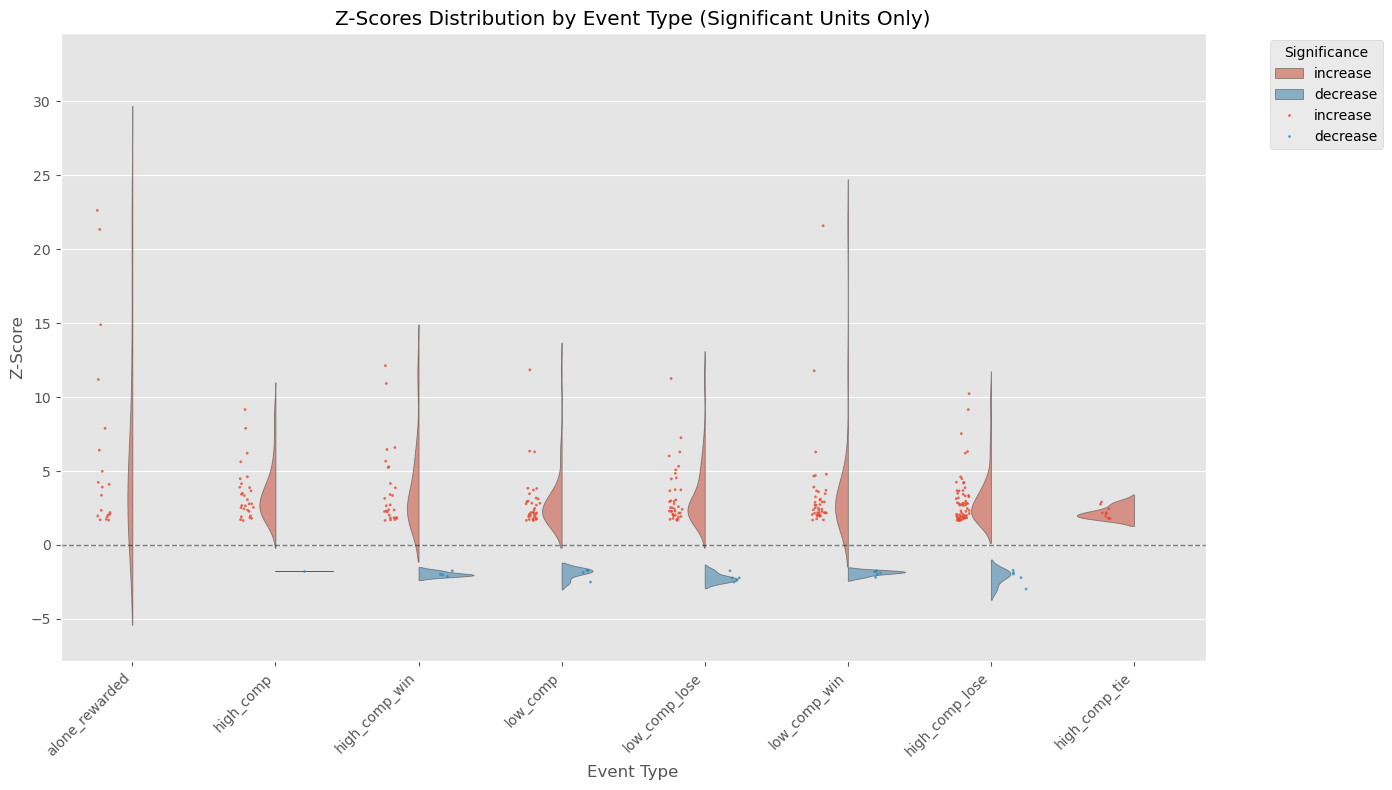

In [128]:
# Filter out baseline events and general win/lose events for swarm plot
events_to_exclude = [
    'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline',
    'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone', 'win', 'lose'
]

swarm_df = units_df[~units_df['Event name'].isin(events_to_exclude)].copy()

# Create swarm plot
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.violinplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', split=True, inner=None, alpha=0.6)
sns.stripplot(data=swarm_df, x='Event name', y='Event Z-Score', hue='sig', size=2, jitter=True, alpha=0.8, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Z-Scores Distribution by Event Type (Significant Units Only)')
plt.xlabel('Event Type')
plt.ylabel('Z-Score')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Adjust y-axis to show negative values clearly
y_min, y_max = plt.ylim()
plt.ylim(y_min * 1.1, y_max * 1.1)  # Add some padding to show negative values clearly

plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Creating Dataframe with numbers of increasing and decreasing sig per event type

In [129]:
def count_sig_types(df):
    event_types = df['Event name'].unique()
    results = []

    # Iterate through each event type and count significant units
    for event in event_types:
        event_df = df[df['Event name'] == event]
        total_units = len(event_df)
        increasing_units = len(event_df[event_df['sig'] == 'increase'])
        decreasing_units = len(event_df[event_df['sig'] == 'decrease'])
        
        results.append({
            'Event name': event,
            'Total Significant Units': total_units,
            'Increasing Units': increasing_units,
            'Decreasing Units': decreasing_units
        })

    return pd.DataFrame(results)

sig_counts_df = count_sig_types(units_df)
sig_counts_df

,Event name,Total Significant Units,Increasing Units,Decreasing Units
0,alone_rewarded,20,20,0
1,high_comp,30,29,1
2,high_comp_win,31,27,4
3,lose,59,55,4
4,low_comp,41,36,5
5,low_comp_lose,44,39,5
6,low_comp_win,48,42,6
7,win,39,37,2
8,high_comp_lose,66,61,5
9,high_comp_tie,10,10,0


In [130]:
# print % of increasing and decreasing units per event type
sig_counts_df['% Increasing Units'] = (sig_counts_df['Increasing Units'] / sig_counts_df['Total Significant Units']) * 100
sig_counts_df['% Decreasing Units'] = (sig_counts_df['Decreasing Units'] / sig_counts_df['Total Significant Units']) * 100
sig_counts_df

,Event name,Total Significant Units,Increasing Units,Decreasing Units,% Increasing Units,% Decreasing Units
0,alone_rewarded,20,20,0,100.000000,0.000000
1,high_comp,30,29,1,96.666667,3.333333
2,high_comp_win,31,27,4,87.096774,12.903226
3,lose,59,55,4,93.220339,6.779661
4,low_comp,41,36,5,87.804878,12.195122
5,low_comp_lose,44,39,5,88.636364,11.363636
6,low_comp_win,48,42,6,87.500000,12.500000
7,win,39,37,2,94.871795,5.128205
8,high_comp_lose,66,61,5,92.424242,7.575758
9,high_comp_tie,10,10,0,100.000000,0.000000


### Need to do
1. Try to make that scatter plot trying to group types by winning and losing, then high_comp low_comp
2. Investigate code that produced this result again. Try to find out why baselines have all the same # of sig neurons, see if they're the same

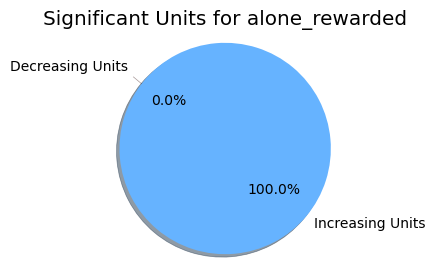

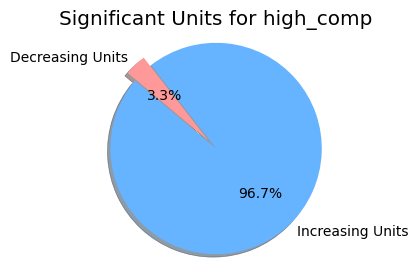

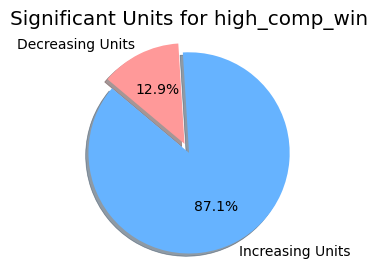

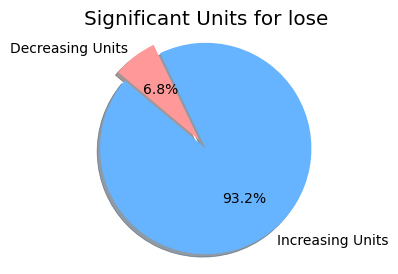

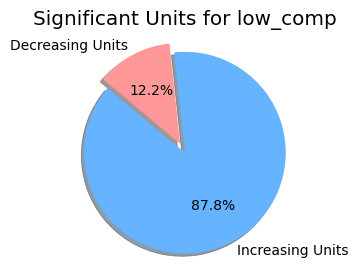

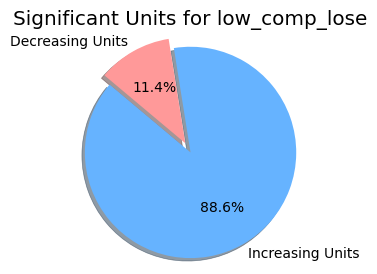

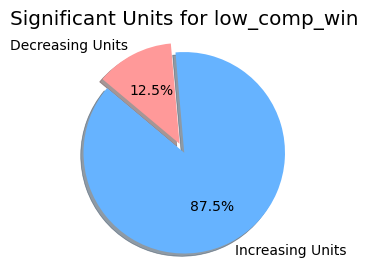

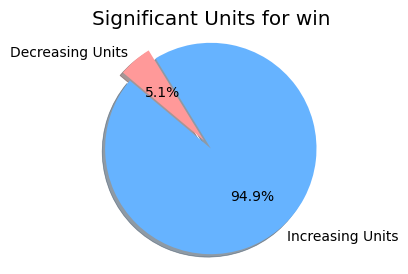

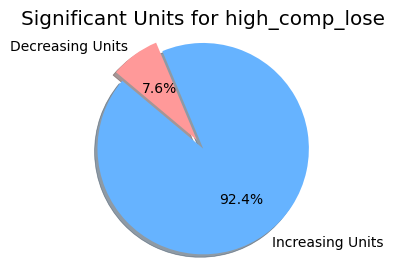

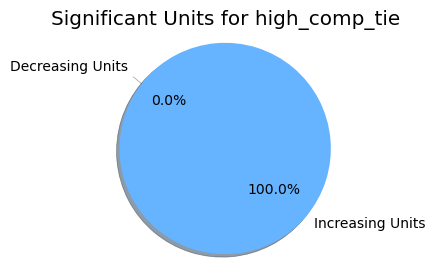

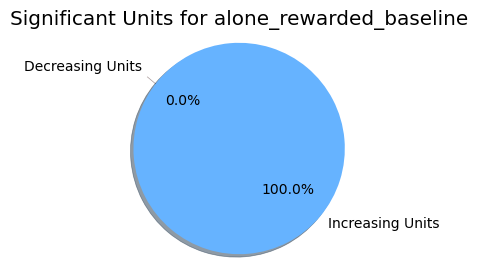

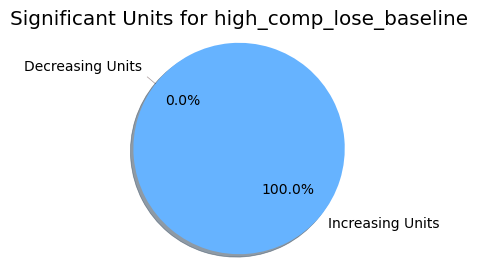

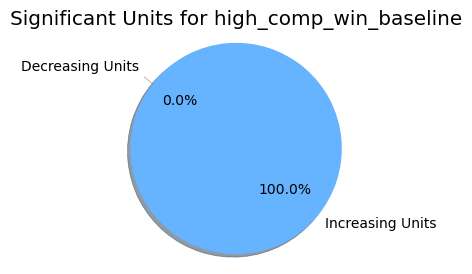

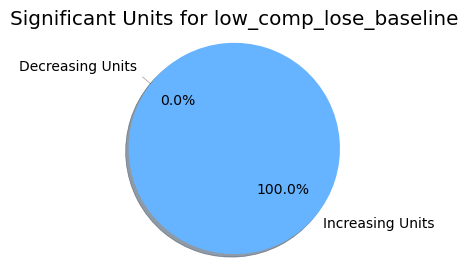

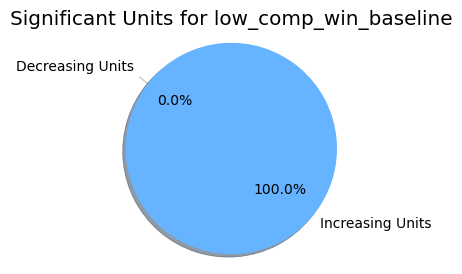

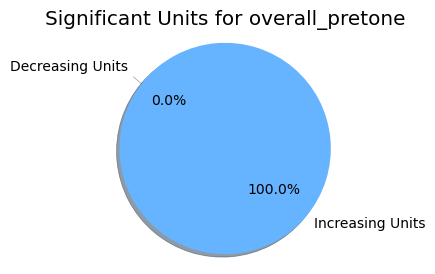

In [131]:
# pie plot of increasing vs decreasing units for each event type
for index, row in sig_counts_df.iterrows():
    labels = ['Increasing Units', 'Decreasing Units']
    sizes = [row['Increasing Units'], row['Decreasing Units']]
    colors = ['#66b3ff', '#ff9999']
    explode = (0.1, 0)  # explode the 1st slice (i.e. 'Increasing Units')

    plt.figure(figsize=(3, 3))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Significant Units for {row["Event name"]}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Bar Plots Quantitating the Number of Increasing and Decreasing Units Per Event

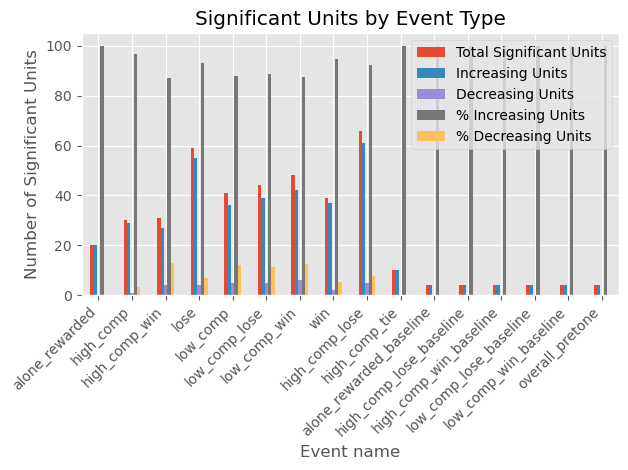

In [132]:
# bar plot of each event type with increasing and decreasing units side by side
sig_counts_df.set_index('Event name').plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

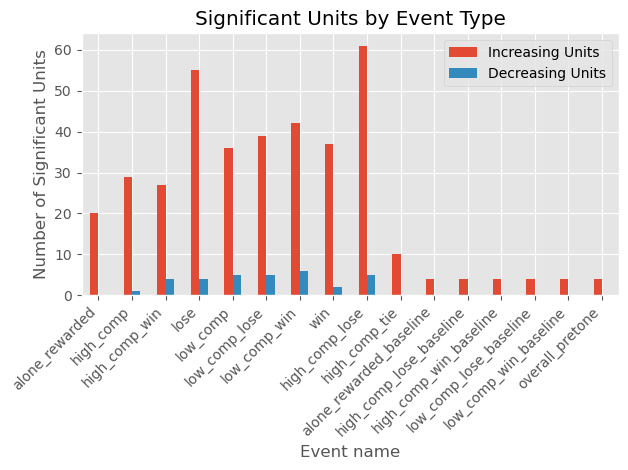

In [133]:
# bar plot of each event type with increasing and decreasing units side by side
sig_counts_df.set_index('Event name')[['Increasing Units', 'Decreasing Units']].plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Dropping Baseline rows

In [134]:
sig_counts_df = sig_counts_df[~sig_counts_df['Event name'].isin([
    'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline',
    'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone'
])]

In [135]:
sig_counts_df.head()

,Event name,Total Significant Units,Increasing Units,Decreasing Units,% Increasing Units,% Decreasing Units
0,alone_rewarded,20,20,0,100.000000,0.000000
1,high_comp,30,29,1,96.666667,3.333333
2,high_comp_win,31,27,4,87.096774,12.903226
3,lose,59,55,4,93.220339,6.779661
4,low_comp,41,36,5,87.804878,12.195122


#### Plot of each Event types Sig increasing and decreasing # of units

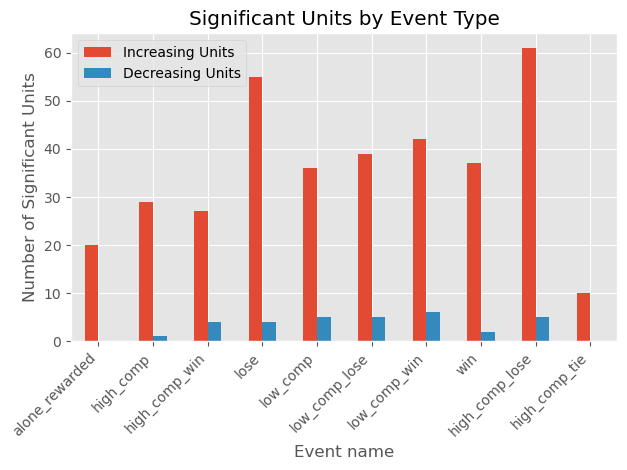

In [136]:
# bar plot of each event type with increasing and decreasing units side by side
sig_counts_df.set_index('Event name')[['Increasing Units', 'Decreasing Units']].plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plot of both increasing and decreasing units, from least to most decreasing units

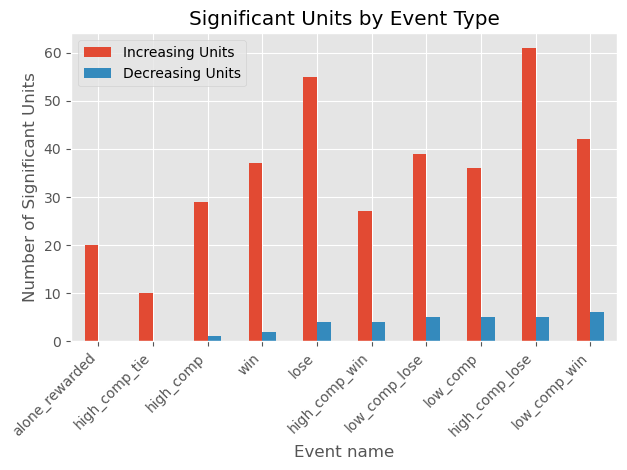

In [137]:
# bar plot of each event type with increasing and decreasing units side by side
# Sort by decreasing units (ascending order - lowest to highest from left to right)
sorted_df = sig_counts_df.sort_values('Decreasing Units')
sorted_df.set_index('Event name')[['Increasing Units', 'Decreasing Units']].plot(kind='bar', stacked=False)
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plot of Decreasing Units per Event

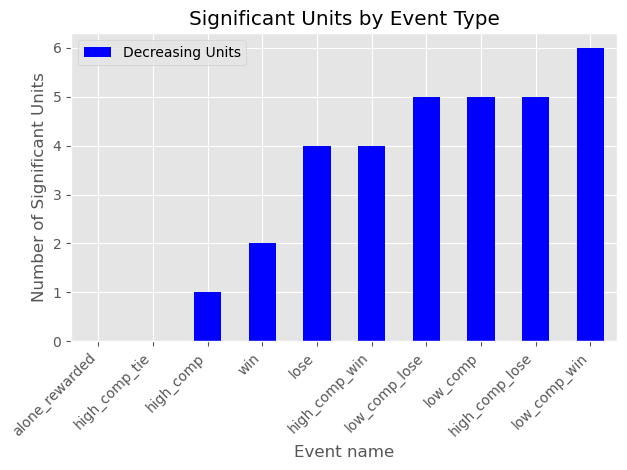

In [138]:
# bar plot of each event type with increasing and decreasing units side by side
# Sort by decreasing units (ascending order - lowest to highest from left to right)
sorted_df = sig_counts_df.sort_values('Decreasing Units')
sorted_df.set_index('Event name')[['Decreasing Units']].plot(kind='bar', stacked=False, color='blue')
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pie Plot of Decreasing Units per Event

## Change this plot to show groupings once fix is done | low comp vs high comp | win vs lose

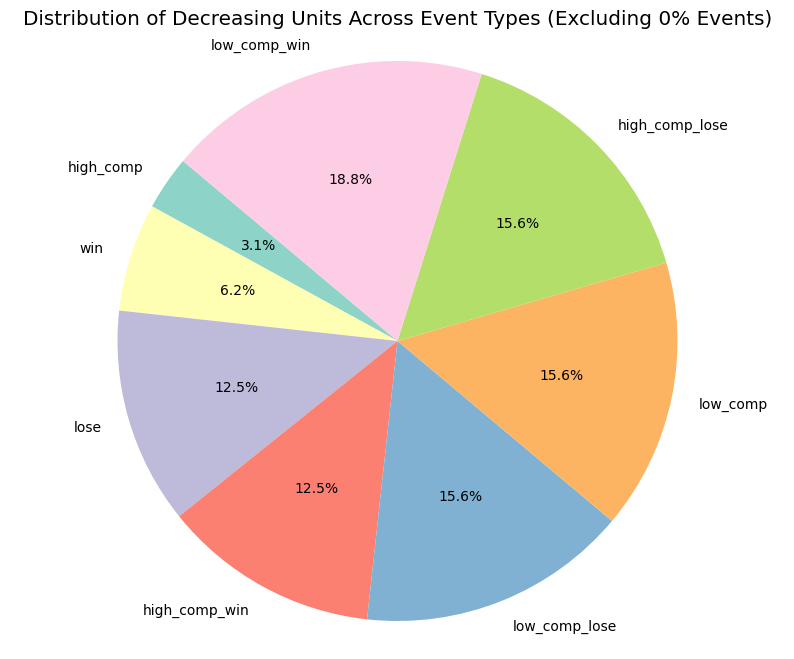

In [139]:
# pie plot of decreasing units per event type (excluding 0% events)
filtered_df = sorted_df[sorted_df['Decreasing Units'] > 0]
labels = filtered_df['Event name'].tolist()
sizes = filtered_df['Decreasing Units'].tolist()
colors = plt.cm.Set3(range(len(labels)))

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decreasing Units Across Event Types (Excluding 0% Events)')
plt.axis('equal')
plt.show()

#### Plot of Increasing Units per event

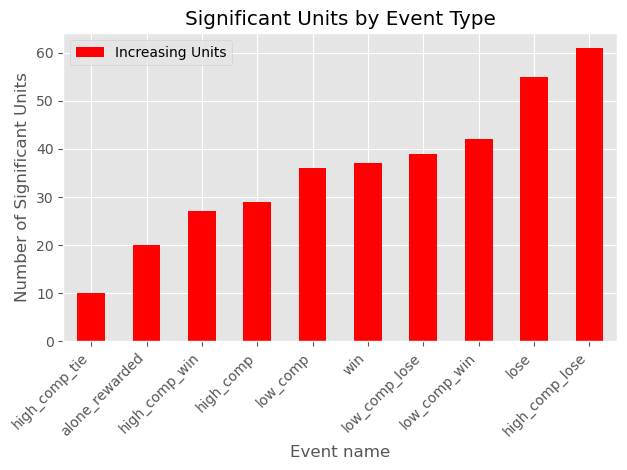

In [140]:
# bar plot of each event type with increasing and decreasing units side by side
# Sort by decreasing units (ascending order - lowest to highest from left to right)
sorted_df = sig_counts_df.sort_values('Increasing Units')
sorted_df.set_index('Event name')[['Increasing Units']].plot(kind='bar', stacked=False, color='red')
plt.ylabel('Number of Significant Units')
plt.title('Significant Units by Event Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [141]:
print(f"{int(sig_counts_df['Total Significant Units'].sum())}")

388


### Grouped Pie Plots by Event Categories
#### Decreasing Units by Win Events

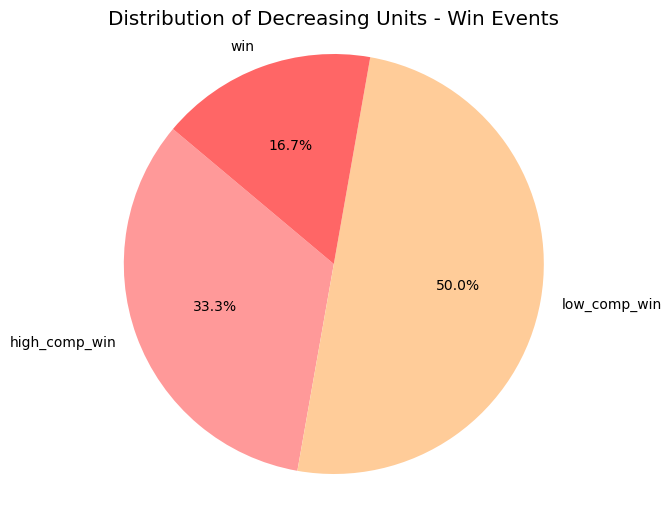

In [142]:
# Group win events and create pie plot for decreasing units
win_events = ['high_comp_win', 'low_comp_win', 'win']
win_df = sig_counts_df[sig_counts_df['Event name'].isin(win_events)]

labels = win_df['Event name'].tolist()
sizes = win_df['Decreasing Units'].tolist()
colors = ['#ff9999', '#ffcc99', '#ff6666']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decreasing Units - Win Events')
plt.axis('equal')
plt.show()

#### Decreasing Units by Lose Events

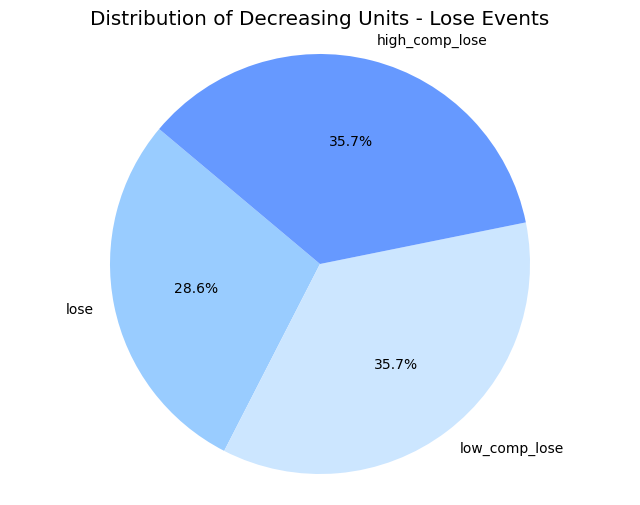

In [143]:
# Group lose events and create pie plot for decreasing units
lose_events = ['high_comp_lose', 'low_comp_lose', 'lose']
lose_df = sig_counts_df[sig_counts_df['Event name'].isin(lose_events)]

labels = lose_df['Event name'].tolist()
sizes = lose_df['Decreasing Units'].tolist()
colors = ['#99ccff', '#cce6ff', '#6699ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decreasing Units - Lose Events')
plt.axis('equal')
plt.show()

#### Increasing Units by Win Events

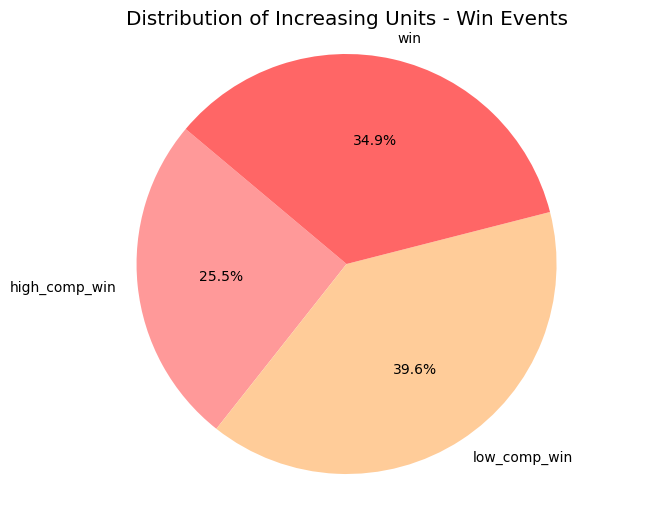

In [144]:
# Group win events and create pie plot for increasing units
win_events = ['high_comp_win', 'low_comp_win', 'win']
win_df = sig_counts_df[sig_counts_df['Event name'].isin(win_events)]

labels = win_df['Event name'].tolist()
sizes = win_df['Increasing Units'].tolist()
colors = ['#ff9999', '#ffcc99', '#ff6666']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Increasing Units - Win Events')
plt.axis('equal')
plt.show()

#### Increasing Units by Lose Events

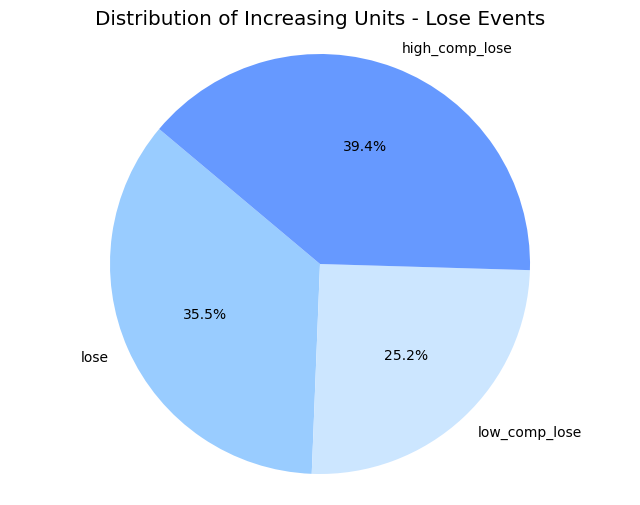

In [145]:
# Group lose events and create pie plot for increasing units
lose_events = ['high_comp_lose', 'low_comp_lose', 'lose']
lose_df = sig_counts_df[sig_counts_df['Event name'].isin(lose_events)]

labels = lose_df['Event name'].tolist()
sizes = lose_df['Increasing Units'].tolist()
colors = ['#99ccff', '#cce6ff', '#6699ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Increasing Units - Lose Events')
plt.axis('equal')
plt.show()